<a href="https://colab.research.google.com/github/Chebem/Artfiical-Intelligence-/blob/main/P02_%EC%98%A4%EB%94%94%EC%98%A4_%EB%B6%84%EB%A5%98_%ED%95%9C%EB%B2%88%EC%97%90_%EB%81%9D%EB%82%B4%EA%B8%B0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

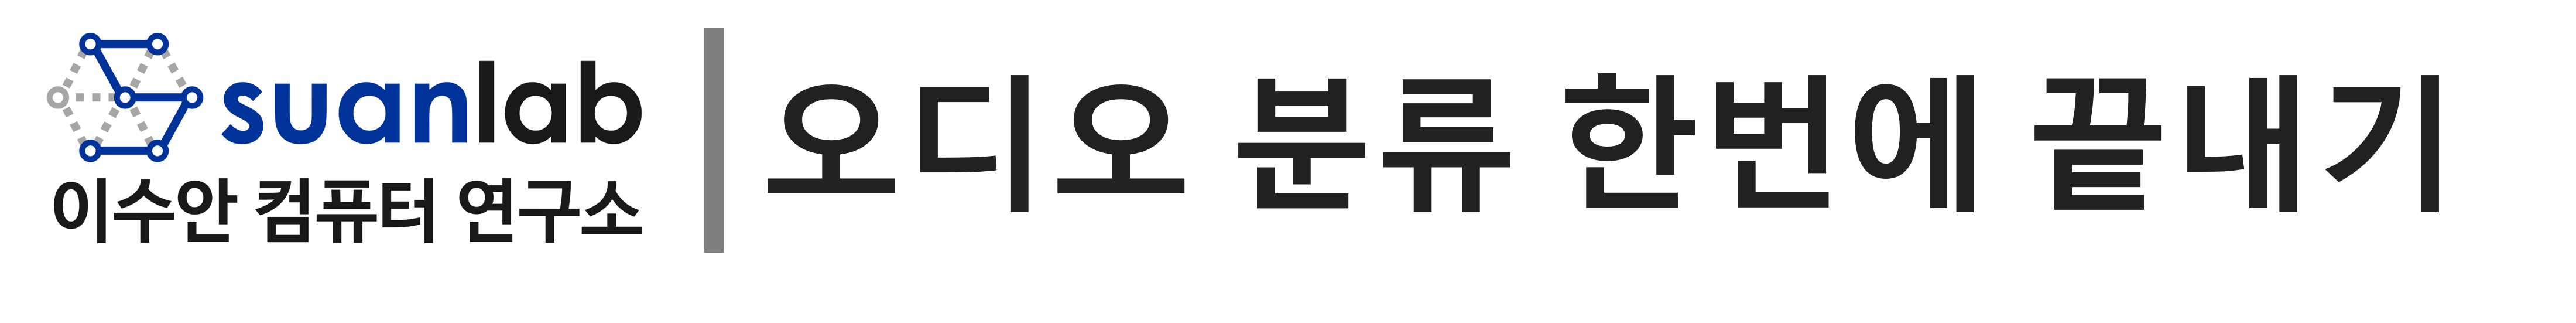

* 가상 악기를 활용해 악기별 음색 데이터셋을 활용해 오디오 분류

1. 기존 데이터에서 분류에 사용되는 방법을 사용해 분류
2. 오디오 데이터에 특화된 분류

# 데이터 준비 및 전처리

* 데이터를 저장할 리스트와 파일을 불러올 경로를 지정
* https://drive.google.com/uc?id=1ie8KQTfQQL-t4a_q6cLUYGz77lJn-JLg


Downloading...
From (original): https://drive.google.com/uc?id=1ie8KQTfQQL-t4a_q6cLUYGz77lJn-JLg
From (redirected): https://drive.google.com/uc?id=1ie8KQTfQQL-t4a_q6cLUYGz77lJn-JLg&confirm=t&uuid=11cf2617-fccd-47d9-90b2-5f730743484e
To: /content/GeneralMidi.wav
100% 3.41G/3.41G [00:46<00:00, 73.9MB/s]


* wmv 파일에는 128개 악기와 46개 타악기의 음을 50개씩 2초 간격으로 존재
* 해당 예제에서는 일부 악기만 선택해서 사용

instrument: 0, note: 0, offset: 0
instrument: 0, note: 1, offset: 2
instrument: 0, note: 2, offset: 4
instrument: 0, note: 3, offset: 6
instrument: 0, note: 4, offset: 8
instrument: 0, note: 5, offset: 10
instrument: 0, note: 6, offset: 12
instrument: 0, note: 7, offset: 14
instrument: 0, note: 8, offset: 16
instrument: 0, note: 9, offset: 18
instrument: 0, note: 10, offset: 20
instrument: 0, note: 11, offset: 22
instrument: 0, note: 12, offset: 24
instrument: 0, note: 13, offset: 26
instrument: 0, note: 14, offset: 28
instrument: 0, note: 15, offset: 30
instrument: 0, note: 16, offset: 32
instrument: 0, note: 17, offset: 34
instrument: 0, note: 18, offset: 36
instrument: 0, note: 19, offset: 38
instrument: 0, note: 20, offset: 40
instrument: 0, note: 21, offset: 42
instrument: 0, note: 22, offset: 44
instrument: 0, note: 23, offset: 46
instrument: 0, note: 24, offset: 48
instrument: 0, note: 25, offset: 50
instrument: 0, note: 26, offset: 52
instrument: 0, note: 27, offset: 54
instrum

(500, 88200) (500,)


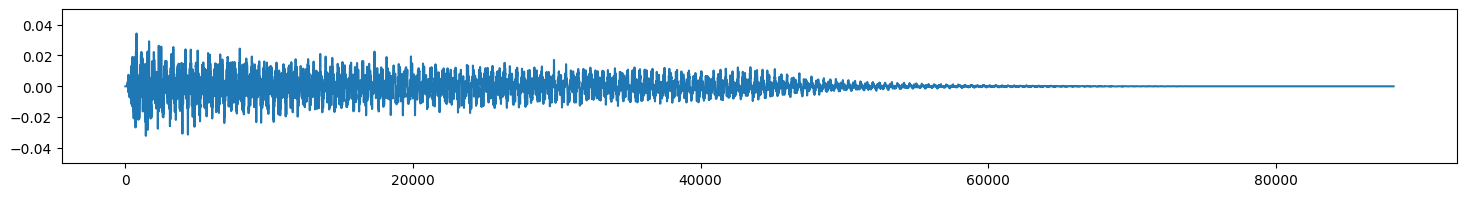

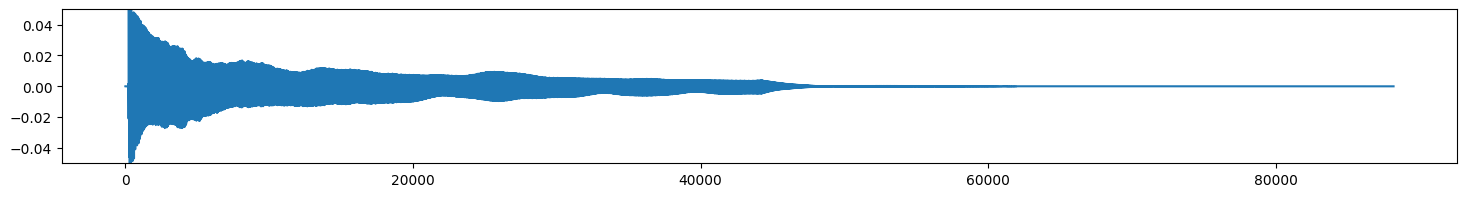

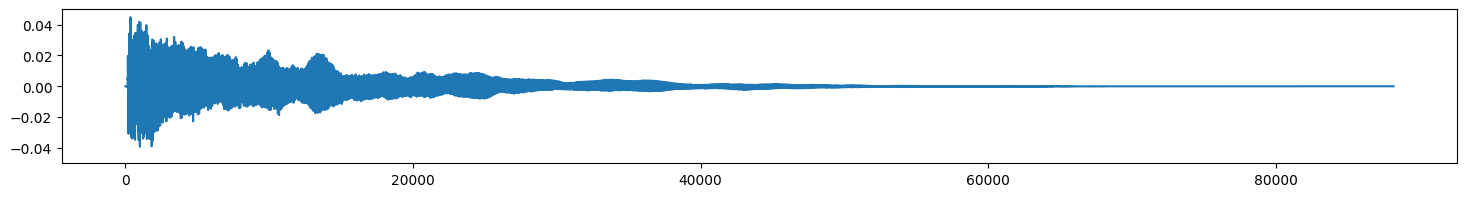

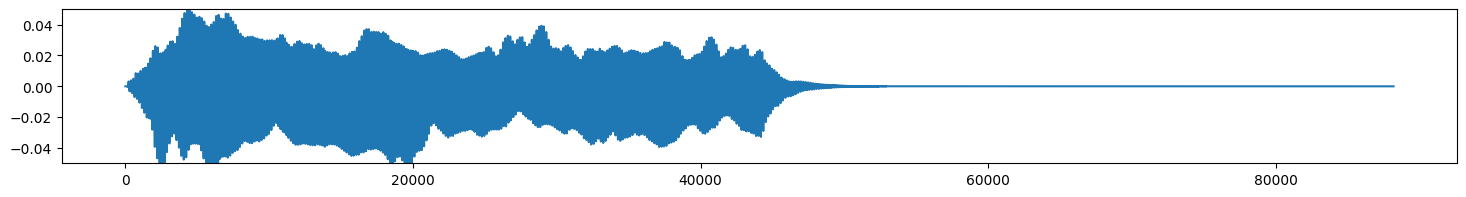

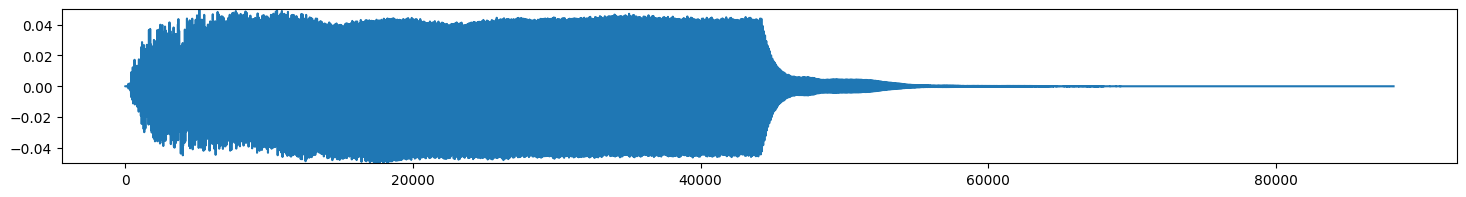

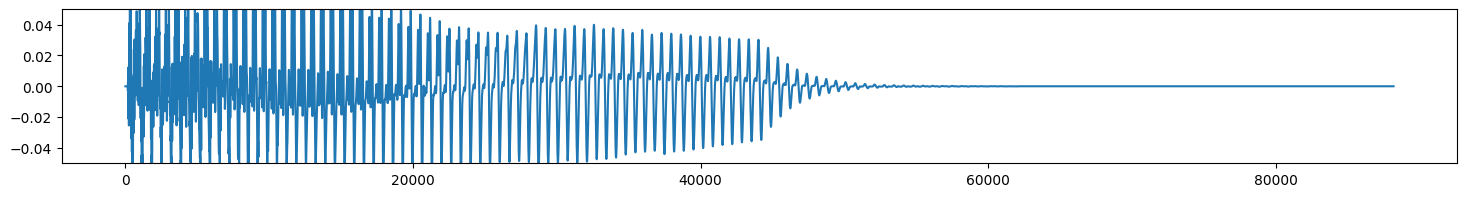

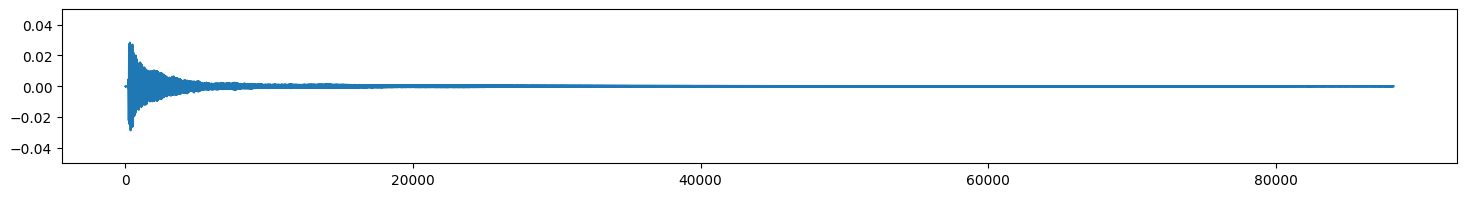

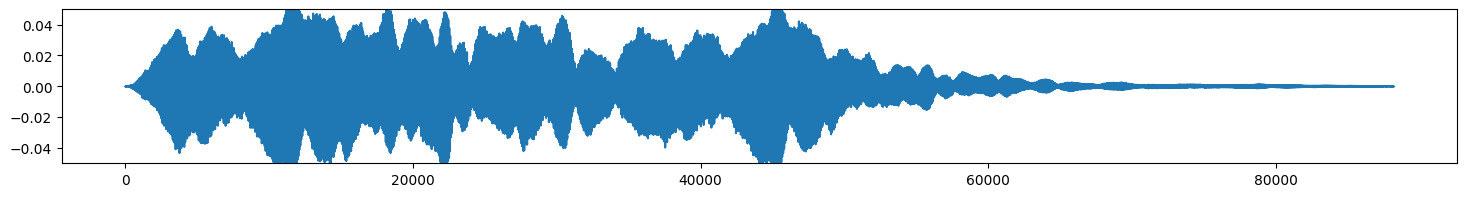

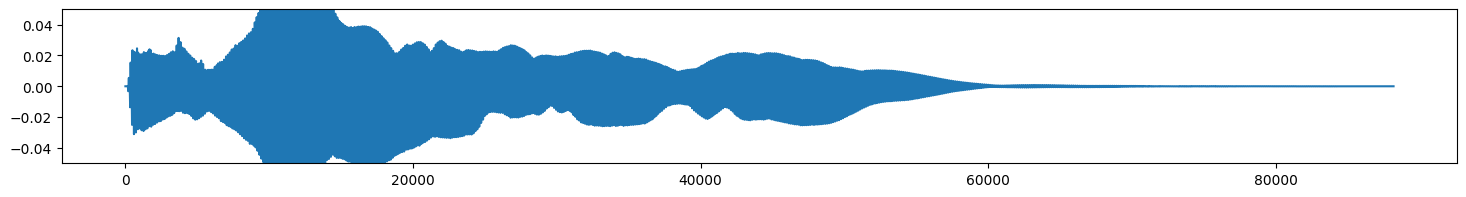

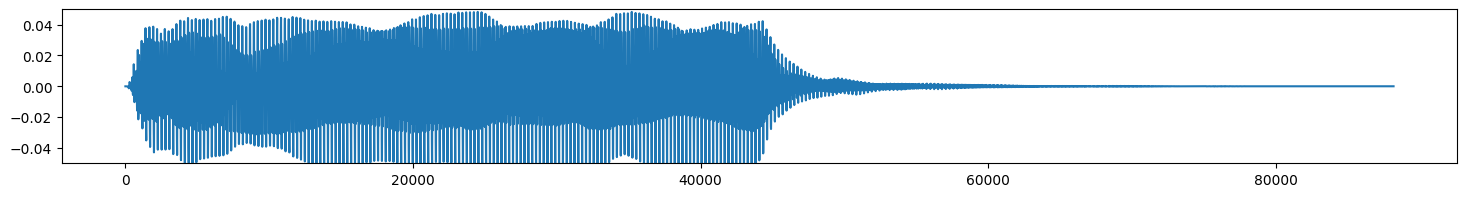

0


1


2


3


4


MinMaxScaler()

# 머신러닝을 이용한 오디오 분류

* 학습 데이터와 실험 데이터를 분리

(400, 88200)
(100, 88200)
(400,)
(100,)


## Logistic Regression

* Logistic Regression은 특성상 다중 분류에는 적합하지 않음

0.08


## Support Vector Machine

0.06


## Decision Tree

0.28


# Constant-Q를 이용한 머신러닝 오디오 분류

## Constant-Q 변환

- 음악과 오디오 분석에서 널리 사용되는 기술
- 주파수의 로그 스케일에 따라 신호를 분석하는 방법
- Fourier 변환의 일종으로 볼 수 있지만, Constant-Q 변환은 각 주파수 대역의 폭이 주파수에 비례하여 변한다는 점에서 차이가 있음
- 이러한 특성 때문에 음악 이론과 밀접하게 관련되어 있으며, 특히 서양 음악에서 12음계 체계와 잘 맞음

* wav는 매 순간의 음압을 측정하여 그 수치를 저장한 형태이기 때문에 그 자체로 음악을 분석하기에 적합하지 않음(음의 높이와 세기를 듣는것이지 순간의 음압을 듣는게 아니기 때문)
* 푸리에 변환과 같은 변환 기법을 이용하여 시간 축의 데이터를 주파수 축의 데이터로 바꿔줘야할 필요가 있음
* 푸리에 변환 대신 푸리에 변환과 유사한 Constant-Q 변환을 사용
* Constant-Q 변환은 주파수 축이 로그 단위로 변환되고, 각 주파수에 따라 해상도가 다양하게 처리되기 때문에(저주파는 저해상도, 고주파는 고해상도) 음악을 처리하는 데에 푸리에 변환보다 유리

* 주파수 대역을 저장할 리스트 `audio_cqt` 선언
* constant-Q 변환할 때는 변환할 오디오 데이터와 sampling rate가 필요
* 해당 데이터에서는 sampling rate가 모두 동일하므로 따로 처리가 필요하지 않음
* Constant-Q 변환을 사용해 오디오 데이터를 주파수 대역으로 변환




*   변환에는 앞서 준비한 데이터를 가져와 사용하며, Constant-Q 변환에는 `librosa.cqt` 함수를 사용
*   여기서 `n_bins`는 옥타브 단계 및 개수를, `bins_per_octave`는 한 옥타브가 가지는 단계를 의미
*   라벨에 대해선 원 핫 인코딩을 적용



* 앞서 생성한 주파수 대역을 spectrogram으로 시각화
* 악기 간 spectrogram을 비교해보면 차이가 존재함을 알 수 있음

<ipython-input-18-426a42d25bab>:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')


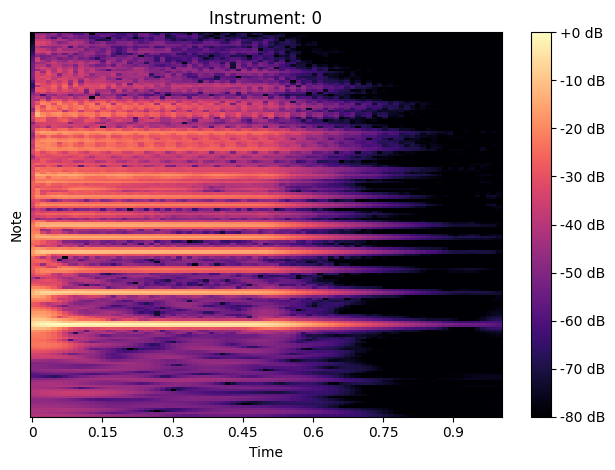

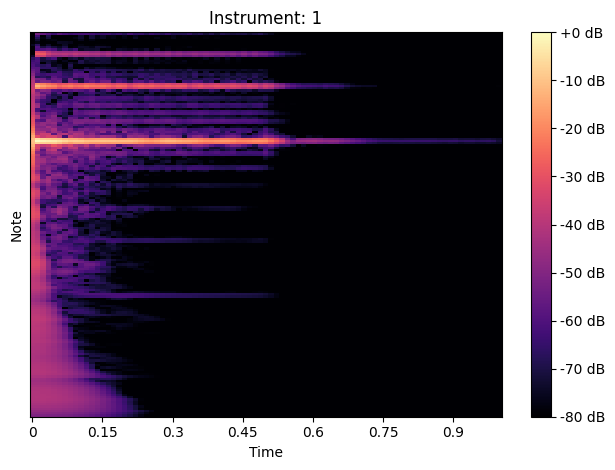

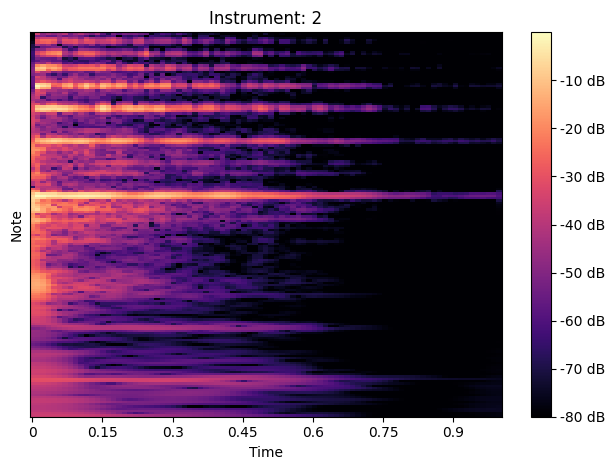

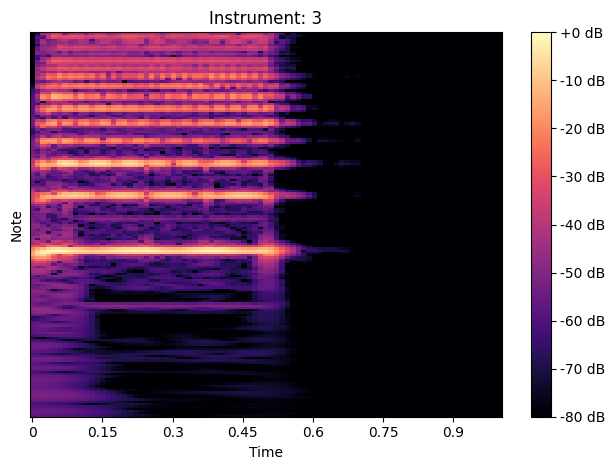

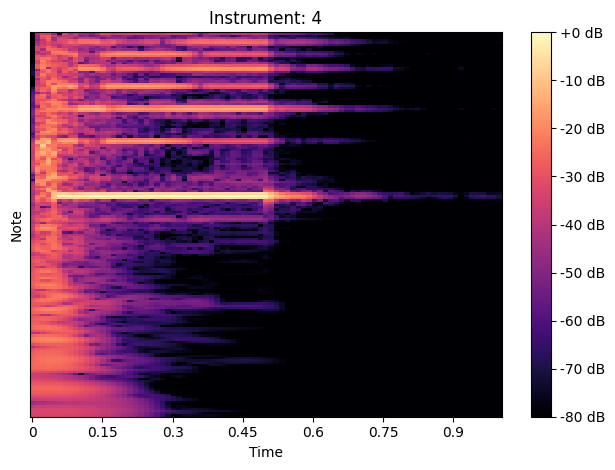

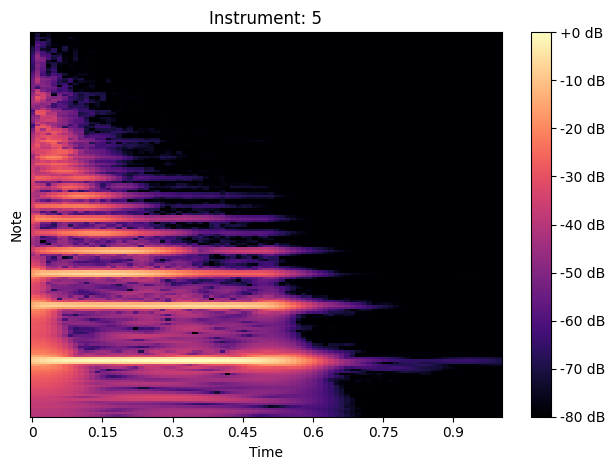

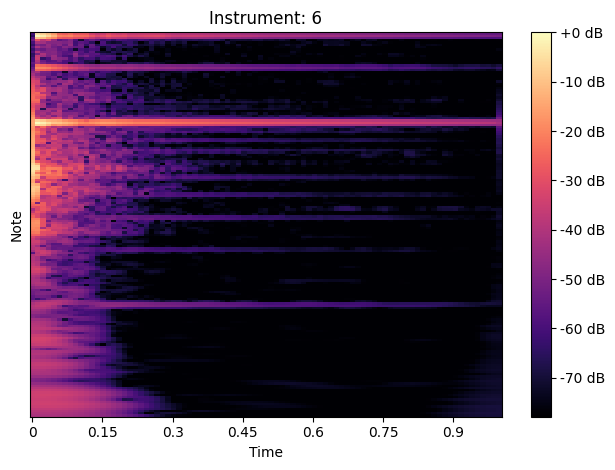

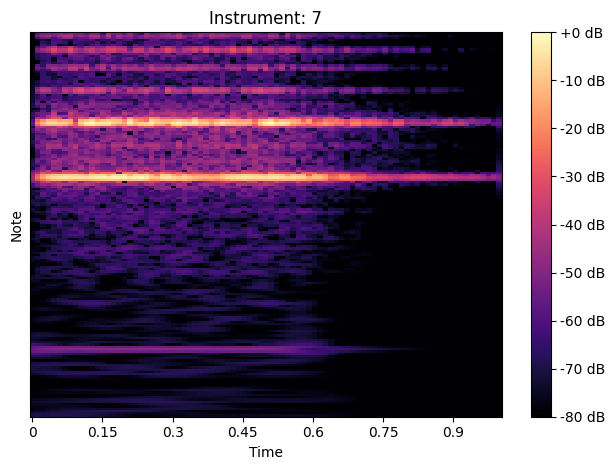

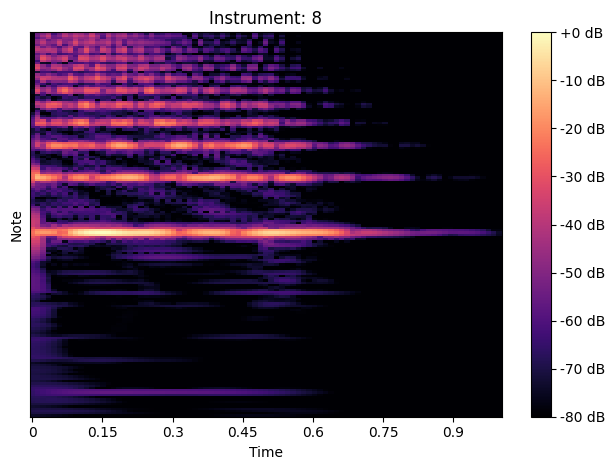

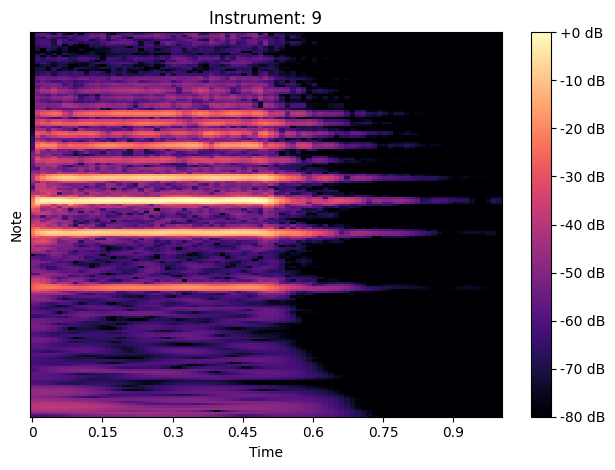

* 훈련 데이터와 실험 데이터를 분리

(500, 168, 87) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환





*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



MinMaxScaler()

* 학습 데이터와 실험 데이터를 분리

(400, 14616)
(100, 14616)
(400,)
(100,)


## Logistic Regression

0.26


## Support Vector Machine

0.28


## Decision Tree

0.65


# Constant-Q 특징을 이용한 딥러닝 오디오 분류

* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

## DNN 모델 구성

(400, 14616, 1)
(100, 14616, 1)
(400, 10)
(100, 10)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 14616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden1 (Dense)                      │ (None, 512)                 │       7,483,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,649,418 (29.18 MB)

 Trainable params: 7,649,418 (29.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/step - acc: 0.1262 - loss: 2.2630 - val_acc: 0.2500 - val_loss: 2.0554
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - acc: 0.4459 - loss: 1.8992 - val_acc: 0.3250 - val_loss: 1.8697
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - acc: 0.5119 - loss: 1.5739 - val_acc: 0.2875 - val_loss: 1.8382
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - acc: 0.6295 - loss: 1.2539 - val_acc: 0.3250 - val_loss: 1.7565
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - acc: 0.7344 - loss: 1.0338 - val_acc: 0.3375 - val_loss: 1.8479
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - acc: 0.7883 - loss: 0.8207 - val_acc: 0.3250 - val_loss: 2.0130
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - acc: 0.8008 - loss: 0.6542 - val_acc: 0.3375 - val_loss: 2.1764
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - acc: 0.8795 - loss: 0.5362 - val_acc: 0.3375 - val_loss: 2.2848
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - acc: 0.8844 - loss: 

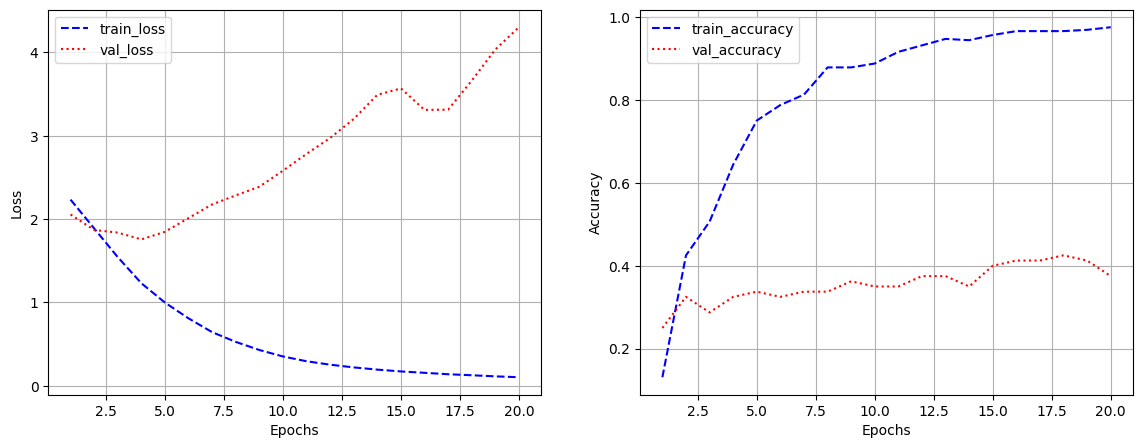

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.3636 - loss: 5.4292


[4.876235485076904, 0.3700000047683716]

## CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 2차원 이미지로 간주


(400, 168, 87, 1)
(100, 168, 87, 1)
(400, 10)
(100, 10)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 168, 87, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 168, 87, 128)        │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 84, 44, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 84, 44, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 42, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 21, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 118272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      60,555,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,197,898 (237.27 MB)

 Trainable params: 62,197,898 (237.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 114s 35s/step - acc: 0.1566 - loss: 2.2760 - val_acc: 0.2250 - val_loss: 2.0366
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 143s 36s/step - acc: 0.3135 - loss: 1.8686 - val_acc: 0.3375 - val_loss: 1.6713
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 146s 35s/step - acc: 0.4895 - loss: 1.3198 - val_acc: 0.3750 - val_loss: 1.6141
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 137s 35s/step - acc: 0.5719 - loss: 1.0861 - val_acc: 0.4750 - val_loss: 1.2457
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 141s 35s/step - acc: 0.6727 - loss: 0.8990 - val_acc: 0.6750 - val_loss: 0.8710
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 143s 36s/step - acc: 0.7762 - loss: 0.6552 - val_acc: 0.6500 - val_loss: 0.8797
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 120s 39s/step - acc: 0.8430 - loss: 0.4382 - val_acc: 0.7125 - val_loss: 1.0125
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 139s 37s/step - acc: 0.8924 - loss: 0.3024 - val_acc: 0.7500 - val_loss: 0.6337
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 109s 34s/step - acc: 0.9133 - loss: 

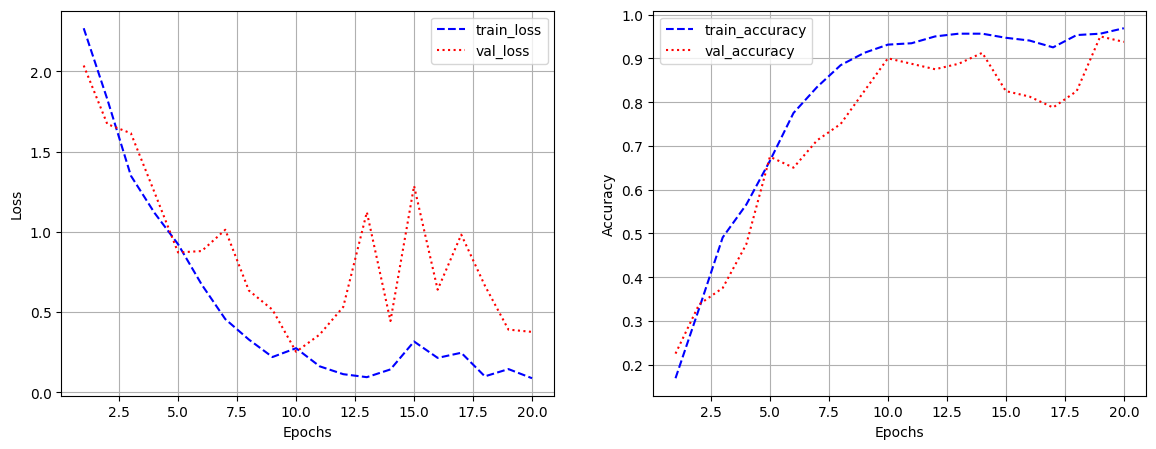



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - acc: 0.8921 - loss: 0.6091


[0.513088047504425, 0.9100000262260437]

# MFCC를 이용한 머신러닝 오디오 분류

## 데이터 준비

* 데이터를 불러오고 MFCC(Mel-frequency cepstral coefficients)를 사용해 melspectrogram으로 변환

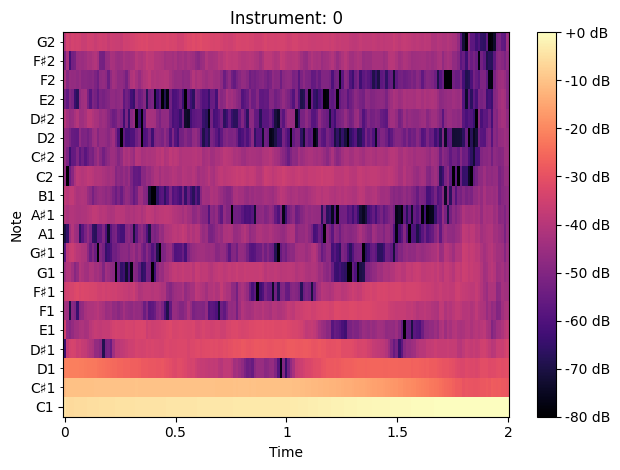

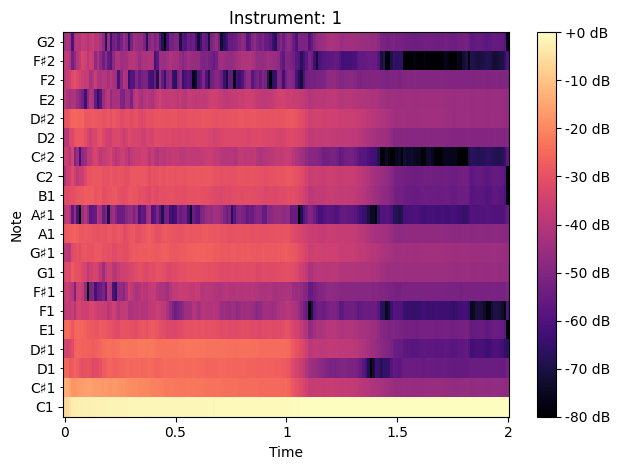

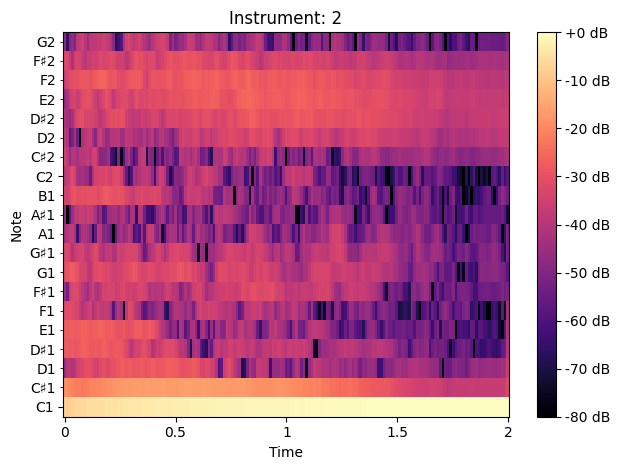

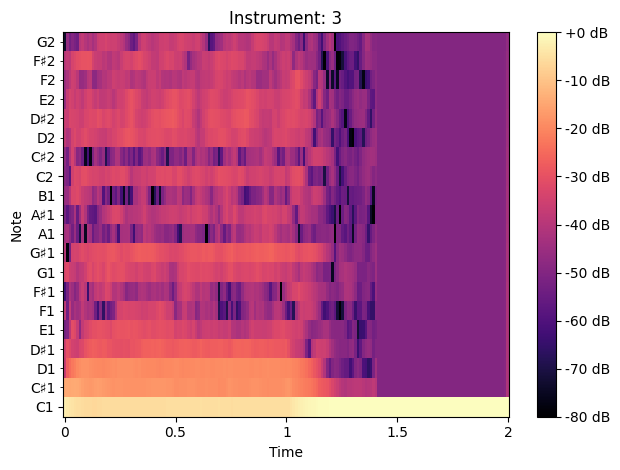

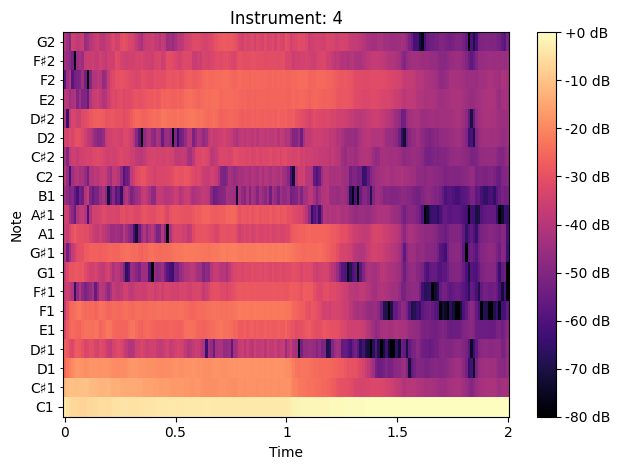

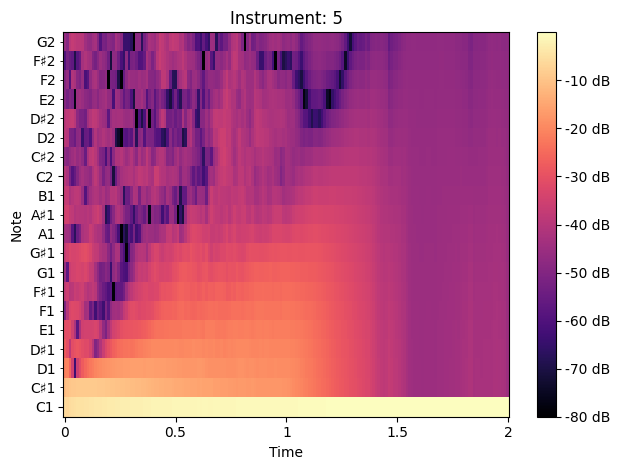

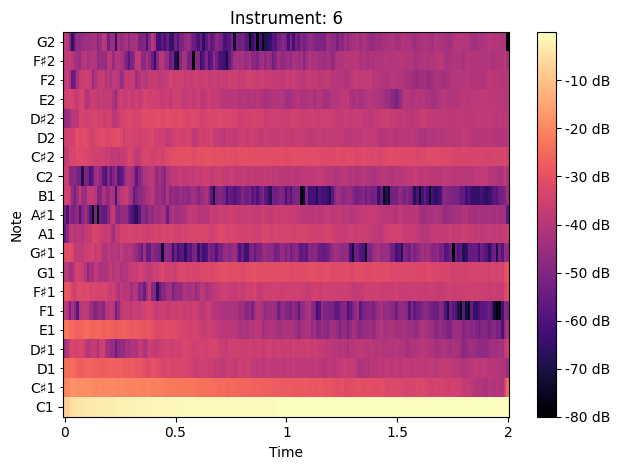

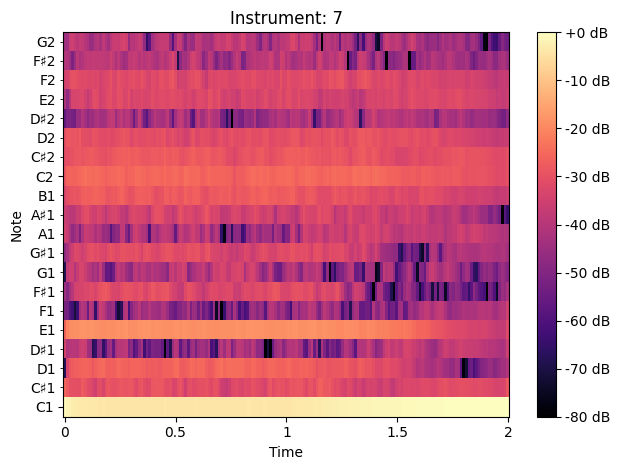

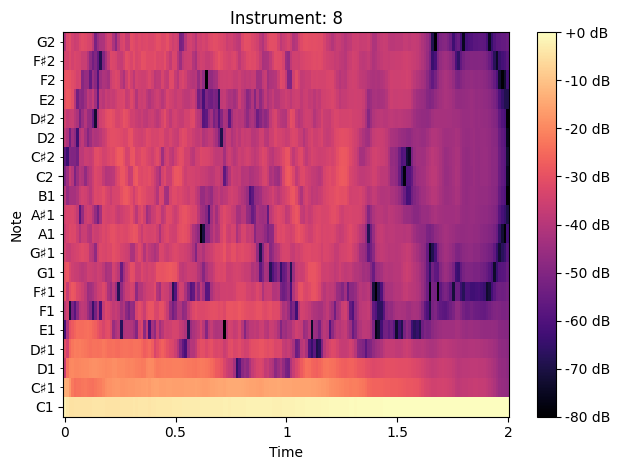

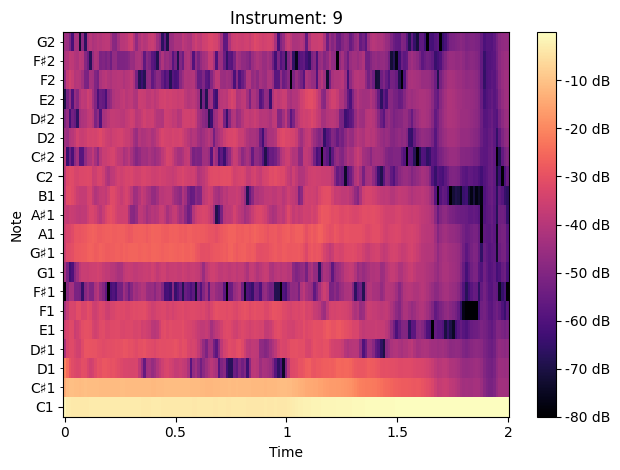

(500, 20, 173) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환





*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



처리 전: [-5.4358069e+02 -4.6765421e+02 -4.5024252e+02 ... -3.4040019e-01
  6.3416773e-01  6.0331500e-01]
처리 후: [-5.4358069e+02 -4.6765421e+02 -4.5024252e+02 ... -3.4040019e-01
  6.3416773e-01  6.0331500e-01]


* 학습 데이터와 실험 데이터를 분리

(400, 3460)
(100, 3460)
(400,)
(100,)


## Logistic Regression

0.95


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Support Vector Machine

0.96


## Decision Tree

0.85


# MFCC를 이용한 딥러닝 오디오 분류

* 앞선 문제점을 극복하기 위해 오디오 데이터에 특화된 분류 방법 필요
* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

## DNN 모델 구성

(400, 3460, 1)
(100, 3460, 1)
(400, 10)
(100, 10)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 3460)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden1 (Dense)                      │ (None, 512)                 │       1,772,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,937,546 (7.39 MB)

 Trainable params: 1,937,546 (7.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - acc: 0.0934 - loss: 210.7088 - val_acc: 0.0875 - val_loss: 391.4805
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - acc: 0.1084 - loss: 348.9762 - val_acc: 0.0750 - val_loss: 241.5009
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - acc: 0.1055 - loss: 193.7797 - val_acc: 0.2125 - val_loss: 84.3856
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - acc: 0.2250 - loss: 73.1790 - val_acc: 0.2750 - val_loss: 57.2770
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - acc: 0.3451 - loss: 53.4835 - val_acc: 0.3500 - val_loss: 52.0268
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - acc: 0.3494 - loss: 41.0244 - val_acc: 0.3750 - val_loss: 21.3354
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - acc: 0.4326 - loss: 19.7126 - val_acc: 0.3375 - val_loss: 26.8858
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - acc: 0.4445 - loss: 19.2090 - val_acc: 0.5875 - val_loss: 15.2230
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - acc: 0.

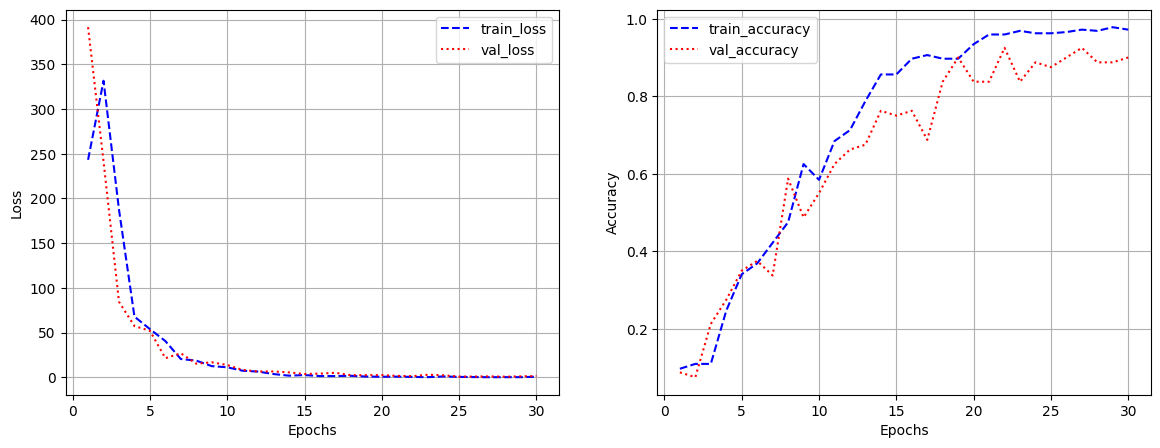

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9230 - loss: 1.3834 


[1.172874927520752, 0.9300000071525574]

## CNN 모델 구성

(400, 20, 173, 1)
(100, 20, 173, 1)
(400, 10)
(100, 10)




*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 2차원 이미지로 간주


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 20, 173, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 20, 173, 128)        │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 87, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 87, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 44, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 5, 44, 512)          │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 22, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 33792)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      17,302,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,912,522 (72.15 MB)

 Trainable params: 18,912,522 (72.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 15s/step - acc: 0.0826 - loss: 62.8764 - val_acc: 0.1125 - val_loss: 45.0711
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 29s 9s/step - acc: 0.1029 - loss: 29.1978 - val_acc: 0.0875 - val_loss: 6.0662
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 11s/step - acc: 0.1361 - loss: 4.4283 - val_acc: 0.1000 - val_loss: 2.2609
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 9s/step - acc: 0.1402 - loss: 2.2467 - val_acc: 0.1750 - val_loss: 2.1863
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - acc: 0.3244 - loss: 2.0284 - val_acc: 0.4000 - val_loss: 1.8856
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - acc: 0.4305 - loss: 1.6930 - val_acc: 0.4250 - val_loss: 1.7294
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - acc: 0.5199 - loss: 1.4998 - val_acc: 0.4750 - val_loss: 1.4480
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 9s/step - acc: 0.6297 - loss: 1.1610 - val_acc: 0.6375 - val_loss: 1.1193
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 9s/step - acc: 0.7695 - loss: 0.8836 - val_

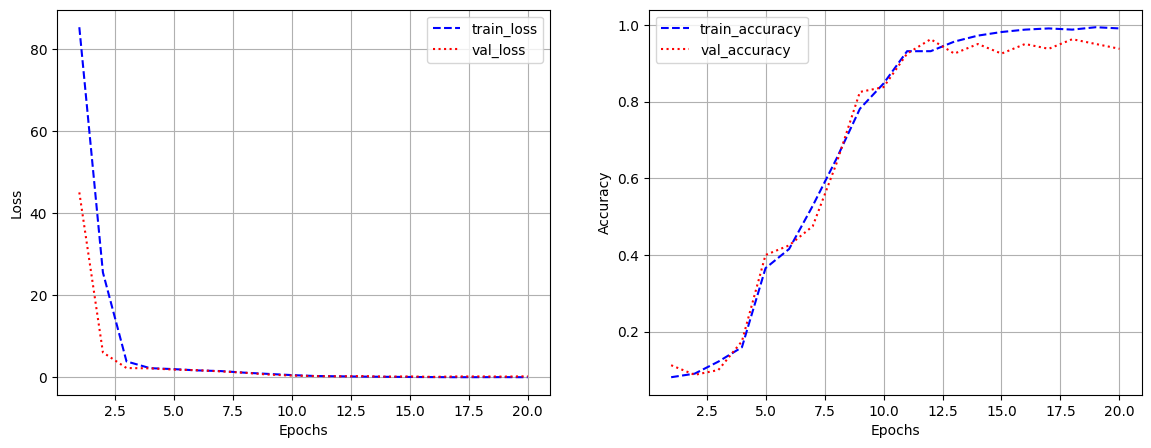

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 563ms/step - acc: 0.9786 - loss: 0.0710


[0.09122421592473984, 0.9700000286102295]

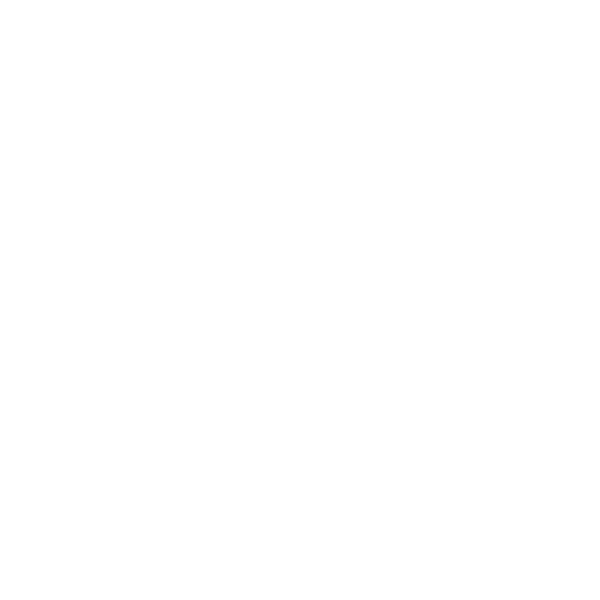

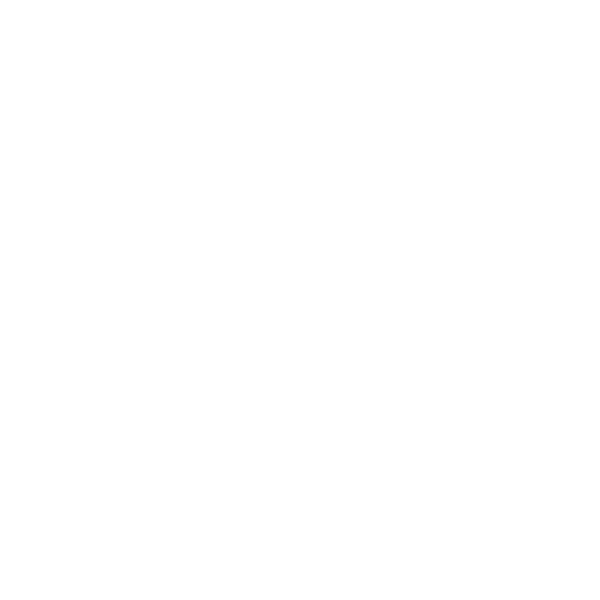

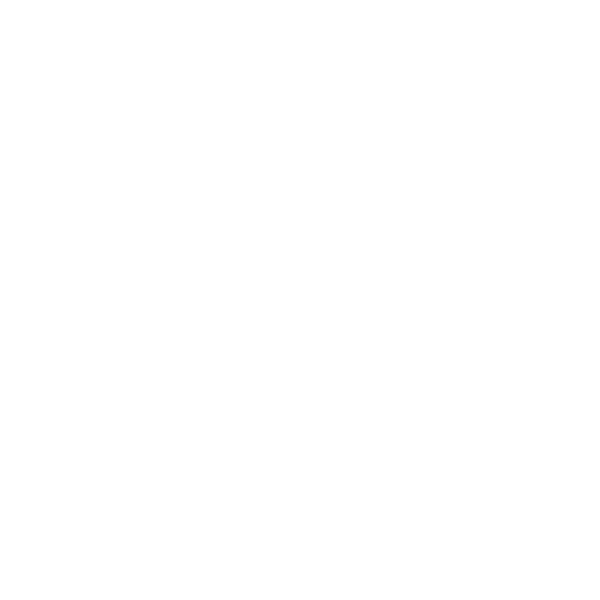

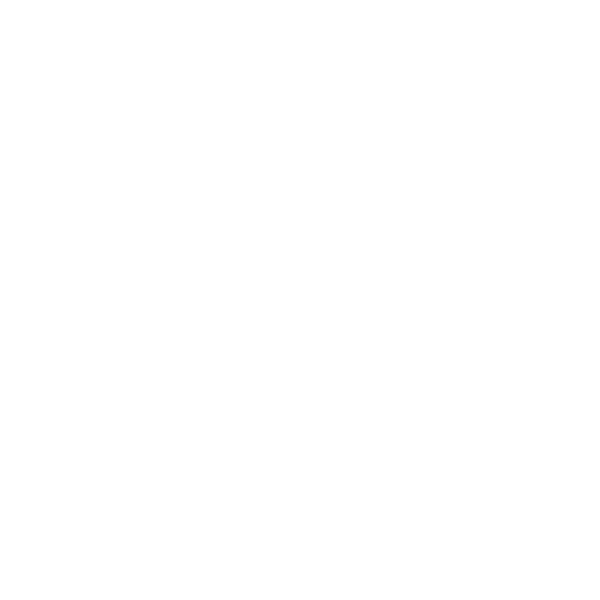

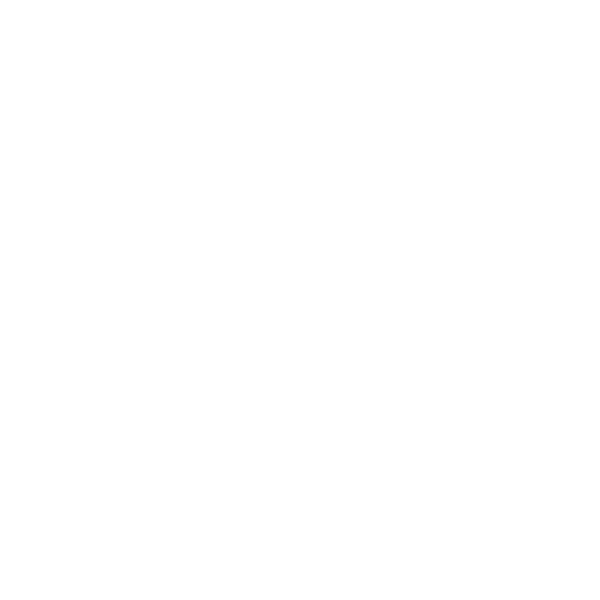

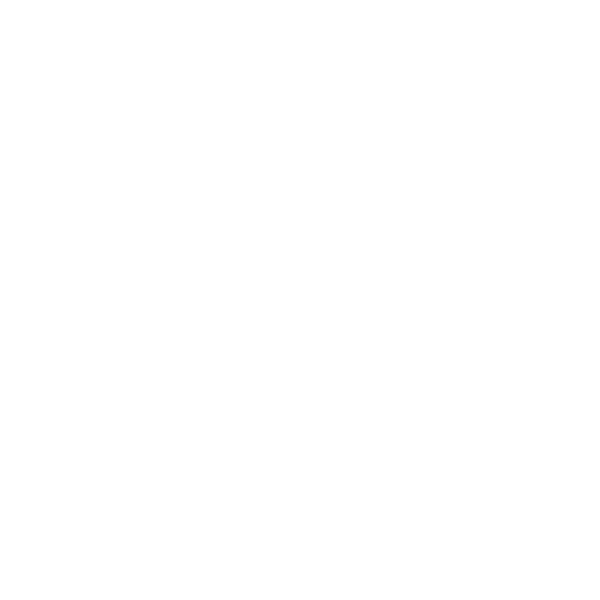

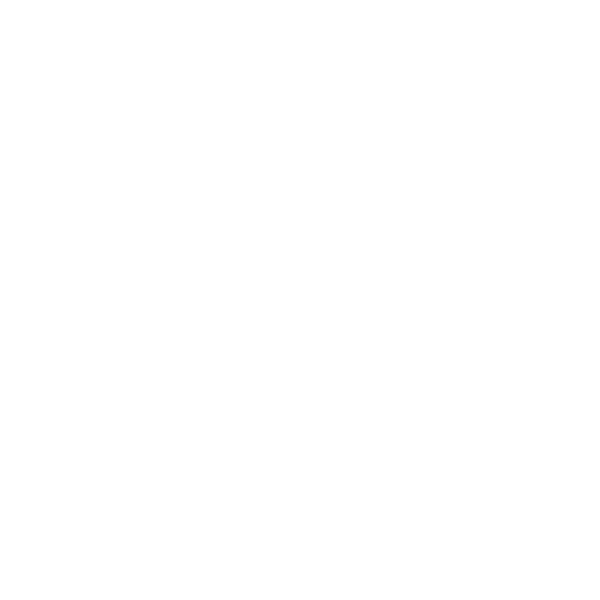

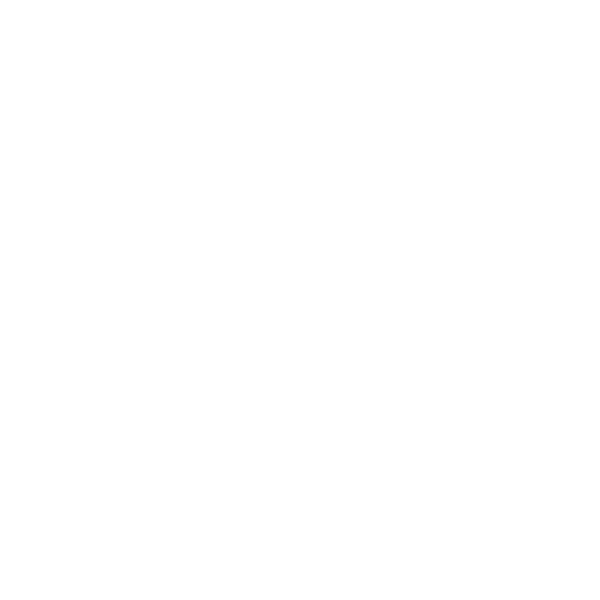

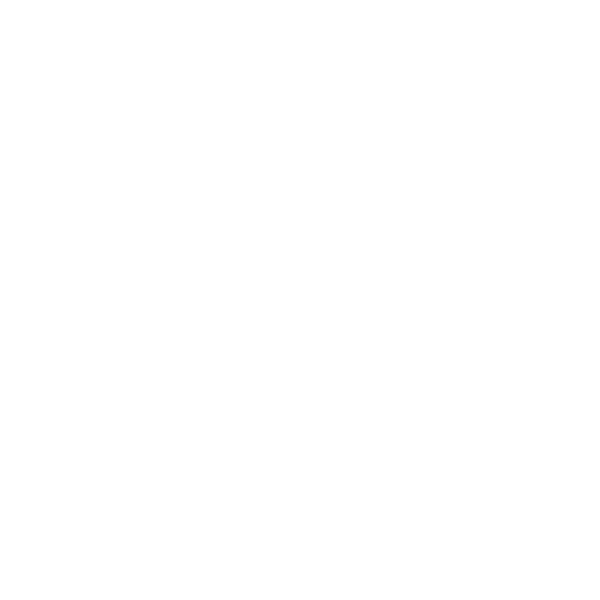

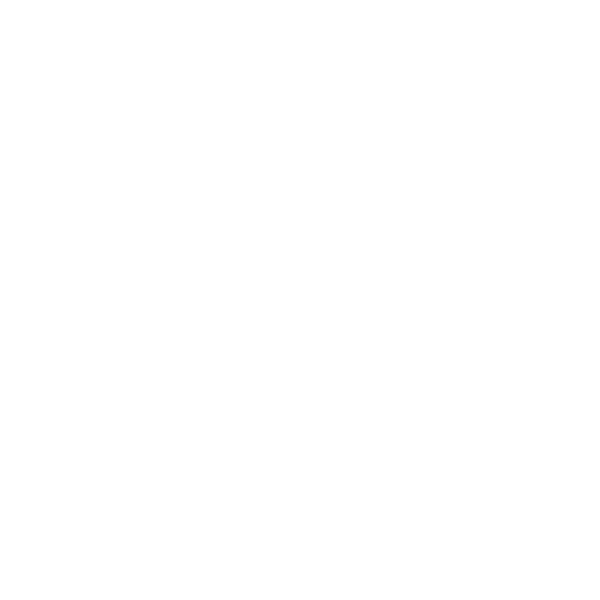